In [116]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#Import NLP modules
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix







Read the Data Set


In [105]:
dataset=pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\sentement  analysis\Restaurant_Reviews.tsv",delimiter='\t',quoting=3)
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
1996,I think food should have flavor and texture an...,0
1997,Appetite instantly gone.,0
1998,Overall I was not impressed and would not go b...,0
1999,"The whole experience was underwhelming, and I ...",0


Clean the Data set

In [106]:
ps = PorterStemmer()
wordwent = WordNetLemmatizer()
#sentenc  = nltk.sent_tokenize()
corpus  = []

for i in  range (0,2001):
     review = re.sub("[^a-zA-Z]",' ',dataset['Review'][i])
     review = review.lower()
     review = review.split()
     review = [wordwent.lemmatize(word) for word in review if not word in set (stopwords.words('english'))]
     review = ' '.join(review)
     corpus.append(review)
     

In [107]:
corpus

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care less interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also combo like bur

Split The Data Set X and Y

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 
x = cv.fit_transform(corpus).toarray()



y = dataset.iloc[:,1].values


In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state=0)
print(x_train,x_test,y_train,y_test,sep="\n")



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['0' '0' '0' ... '1' '1' '1']
['0' '0' '1' '1' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0'
 '1' '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '1' '1' '1' '1' '1' '1' '0' '0'
 '1' '0' '1' '0' '0' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '1' '1' '0' '1' '1' '1' '1' '0'
 '1' '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0'
 '0' '1' '1' '0' '0' '1' '0' '1' '1' '0' '1' '1' '1' '0' '0' '0' '0' '1'
 '0' '0' '1' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0' '1' '1' '0'
 '1' '1' '1' '0' '1' '1' '0' '0' '0' '1' '0' '1' '1' '1' '1' '1' '1' '1'


# Define all models

In [111]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [127]:
results = []

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Approximate Bias and Variance
    bias = 1 - acc
    variance = 0  # Since we only use test accuracy
    
    # Append results
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Bias": round(bias, 4),
        "Variance": round(variance, 4)
    })
    
    # Print classification report
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))








Logistic Regression
Accuracy: 0.9526
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       195
           1       0.95      0.96      0.95       206

    accuracy                           0.95       401
   macro avg       0.95      0.95      0.95       401
weighted avg       0.95      0.95      0.95       401


SVM
Accuracy: 0.9576
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       195
           1       0.97      0.95      0.96       206

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401


Random Forest
Accuracy: 0.9726
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       195
           1       0.99      0.96      0.97       206

    accuracy                           0.97       401
   macro avg       0.97      0.97   

Coinfusion  Matrics

In [115]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[185  10]
 [ 67 139]]


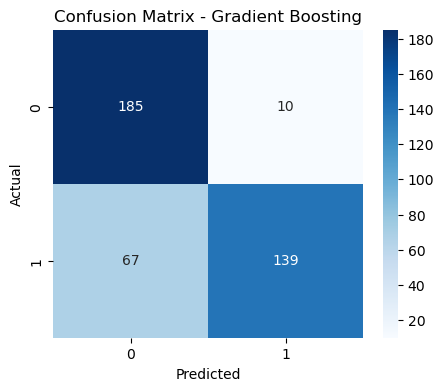

In [117]:
# Optional: plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


find the accurecy of modells

In [128]:
# Convert to DataFrame and sort by Accuracy
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nSummary Table:")
print(results_df)



Summary Table:
                 Model  Accuracy    Bias  Variance
2        Random Forest    0.9726  0.0274         0
3        Decision Tree    0.9626  0.0374         0
1                  SVM    0.9576  0.0424         0
0  Logistic Regression    0.9526  0.0474         0
5          Naive Bayes    0.8653  0.1347         0
6    Gradient Boosting    0.8055  0.1945         0
4                  KNN    0.7307  0.2693         0


    Pickleing all the file

In [135]:
for name, model in models.items():
    filename = f"{name.replace(' ', '_')}_with_vectorizer.pkl"
    with open(filename, 'wb') as file:
        pickle.dump({
            'vectorizer': cv,
            'model': model
        }, file)
    print(f"{filename} saved with vectorizer!")


    


Logistic_Regression_with_vectorizer.pkl saved with vectorizer!
SVM_with_vectorizer.pkl saved with vectorizer!
Random_Forest_with_vectorizer.pkl saved with vectorizer!
Decision_Tree_with_vectorizer.pkl saved with vectorizer!
KNN_with_vectorizer.pkl saved with vectorizer!
Naive_Bayes_with_vectorizer.pkl saved with vectorizer!
Gradient_Boosting_with_vectorizer.pkl saved with vectorizer!
